In [113]:
#Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [114]:
dataset=pd.read_csv('Phase3.csv')

In [115]:
dataset.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate  
0                      1.00  
1                      1.00  
2                      0.00  
3                      0.00  
4                      0.71  

[5 rows x 41 columns]

In [116]:
xx=pd.get_dummies(dataset) 

In [117]:
xx.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0          0          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         2      12983          0     0               0       0    0   
3         0         20          0     0               0       0    0   
4         1          0         15     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_REJ  flag_RSTO  \
0                  0          0                0  ...         1          0   
1                  0          0                0  ...         1          0   
2                  0          0                0  ...         0          0   
3                  0          0                0  ...         0          0   
4                  0          0                0  ...         0          1   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0            0          0        0        0        0        0        0   
1            0          0        0        0        0        0        0   
2            0          0        0        0        0        0        1   
3            0          0        0        0        0        0        1   
4            0          0        0        0        0        0        0   

   flag_SH  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 116 columns]

In [118]:
from sklearn.preprocessing import scale #en charge la fonction de normalisation à partir de la bibliothèque sklearn
data = scale(xx) # normaliser les données

In [119]:
xx.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.150328      0.496659   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised  ...      flag_REJ     flag_RSTO   flag_RSTOS0  \
count     22544.000000  ...  22544.000000  22544.000000  22544.000000   
mean          0.119899  ...      0.170777      0.034289      0.000089   
std           7.269597  ...      0.376322      0.181973      0.009419   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           0.000000  ...      0.000000      0.000000      0.000000   
50%           0.000000  ...      0.000000      0.000000      0.000000   
75%           0.000000  ...      0.000000      0.000000      0.000000   
max         796.000000  ...      1.000000      1.000000      1.000000   

          flag_RSTR       flag_S0       flag_S1       flag_S2       flag_S3  \
count  22544.000000  22544.000000  22544.000000  22544.000000  22544.000000   
mean       0.029675      0.089292      0.000932      0.000665      0.011045   
std        0.169694      0.285171      0.030507      0.025787      0.104516   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            flag_SF       flag_SH  
count  22544.000000  22544.000000  
mean       0.659821      0.003238  
std        0.473780      0.056813  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 116 columns]

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage  # on utilise la bibliothèque scipy pour appliquer le CHA
from matplotlib import pyplot as plt # la bibliothèque matplotlib est utilisé pour la visualition

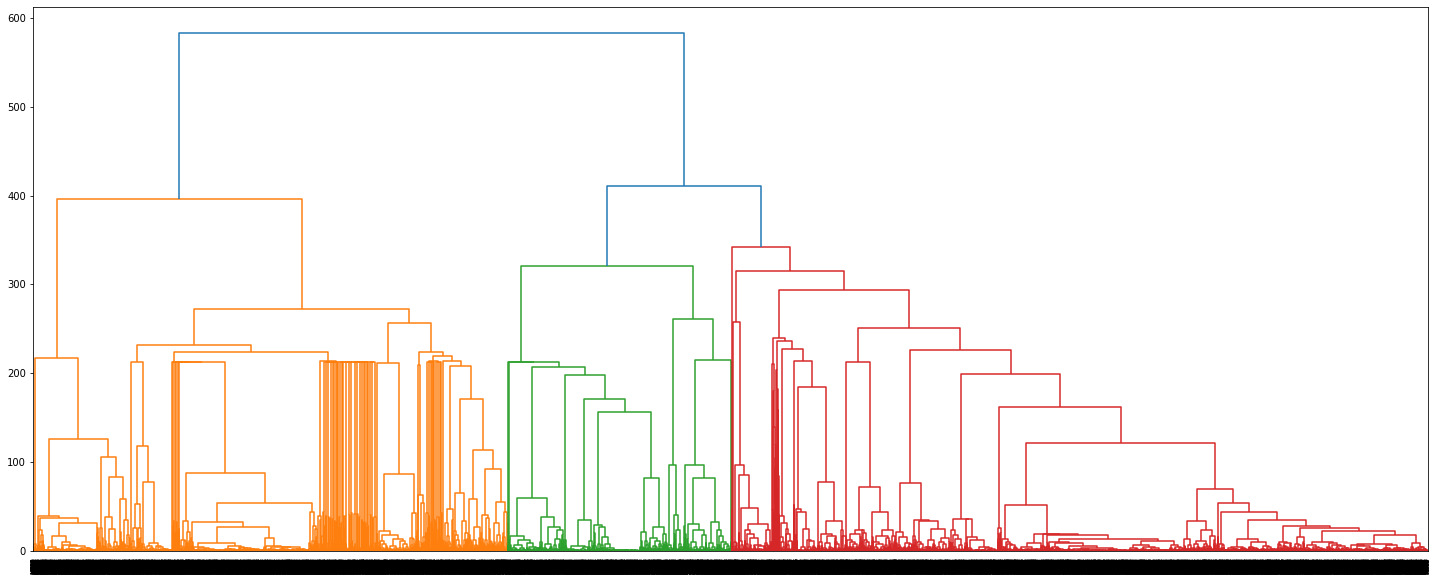

In [14]:
Z = linkage(data, 'ward') #CHA avec critère de regroupement Ward
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [121]:
#Création d'un objet K-Means avec un regroupement en 3 clusters (groupes)
model=KMeans(n_clusters=3)
#application du modèle sur notre jeu de données Iris
model.fit(data)

KMeans(n_clusters=3)

In [122]:
labels=model.labels_
print(model.labels_)

[2 2 0 ... 0 1 2]


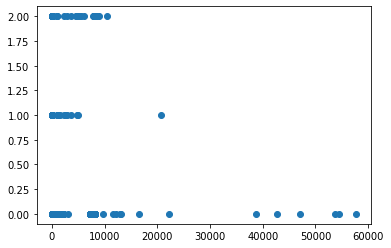

In [123]:
#Visualisation des clusters
plt.scatter(xx.duration,labels)
plt.show()
colormap=np.array(['Red','green','blue'])

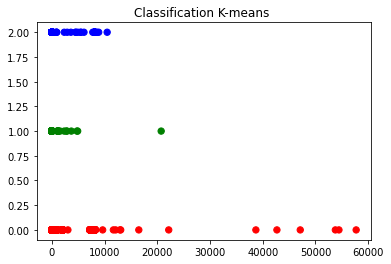

In [124]:
#Visualisation des clusters formés par K-Means
plt.scatter(xx.duration	,labels,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')
plt.show()

On voit que quand la duration varie de (0) a (15000) on a les donnes sont regrouper de manier tres proche 
Mais de (15000) a (60000) sont pas proche donc ce sont les anomaly

3.2. Mesurez les performances de cet algorithme.

In [125]:
#Mesurez les performances de cet algorithme
#
from sklearn.metrics import silhouette_score
score = []
#
for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(data)
    labels = kmeans.labels_
    score.append(silhouette_score(data, labels, metric = 'euclidean'))#append(kmeans.inertia_)

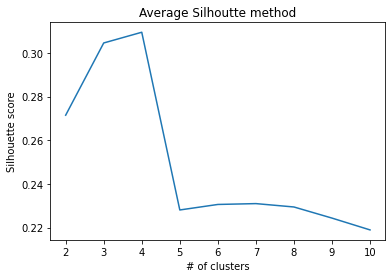

In [126]:
# plotting the score
plt.plot(range(2,11), score)
plt.title('Average Silhoutte method')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')
plt.show()

On voit que le score de Silhoutte et entre 0 <= S <= 0.51 
donc les performances de cet algorithme a une structure faible ou pas de structure identifiée


3.3. Est-il possible de combiner vos travaux sur le fichier Phase3.csv et Phase2.csv afin d'obtenir un
modèle robuste?

In [127]:
phase3=pd.read_csv("Phase3.csv")
phase2=pd.read_csv("Phase2.csv")
#Fusionner la donnée dans une seul dataframe en Contaténat train et test
dataset1 =  pd.concat(objs=[phase3, phase2], axis=0).reset_index(drop=True)

In [128]:
dataset1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47736 entries, 0 to 47735
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     47736 non-null  int64  
 1   protocol_type                47736 non-null  object 
 2   service                      47736 non-null  object 
 3   flag                         47736 non-null  object 
 4   src_bytes                    47736 non-null  int64  
 5   dst_bytes                    47736 non-null  int64  
 6   land                         47736 non-null  int64  
 7   wrong_fragment               47736 non-null  int64  
 8   urgent                       47736 non-null  int64  
 9   hot                          47736 non-null  int64  
 10  num_failed_logins            47736 non-null  int64  
 11  logged_in                    47736 non-null  int64  
 12  num_compromised              47736 non-null  int64  
 13  root_shell      

In [129]:
dataset1.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  47736.000000  4.773600e+04  4.773600e+04  47736.000000    47736.000000   
mean     264.347285  1.774954e+04  2.813757e+03      0.000189        0.016507   
std     2178.505660  1.781220e+06  6.616178e+04      0.013730        0.213064   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.500000e+01  3.600000e+01      0.000000        0.000000   
75%        0.000000  2.840000e+02  5.990000e+02      0.000000        0.000000   
max    57715.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  47736.000000  47736.000000       47736.000000  47736.000000   
mean       0.000356      0.154286           0.010851      0.417169   
std        0.025481      1.690612           0.108927      0.493097   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_count  dst_host_srv_count  \
count     47736.000000  ...    47736.000000        47736.000000   
mean          0.176869  ...      187.886291          127.194319   
std           9.068051  ...       96.848516          111.921285   
min           0.000000  ...        0.000000            0.000000   
25%           0.000000  ...       99.000000           12.000000   
50%           0.000000  ...      255.000000           98.000000   
75%           0.000000  ...      255.000000          255.000000   
max         884.000000  ...      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            47736.000000            47736.000000   
mean                 0.561790                0.086317   
std                  0.444949                0.203750   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.760000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 47736.000000                 47736.000000   
mean                      0.140278                     0.026080   
std                       0.307468                     0.099666   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.040000                     0.010000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          47736.000000              47736.000000          47736.000000   
mean               0.197021                  0.194640              0.172387   
std                0.385606                  0.388126              0.351446   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.020000                  0.000000              0.020000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count              47736.000000  
mean                   0.169733  
std                    0.363230  
min                    0.000000  
25%                    0.000000  
50%         

In [130]:
dataset1.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   
4               0       0    0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate  class  
0                      1.00    NaN  
1                      1.00    NaN  
2                      0.00    NaN  
3                      0.00    NaN  
4                      0.71    NaN  

[5 rows x 42 columns]

In [131]:
dataset1.isnull().sum()

duration                           0
protocol_type                      0
service                            0
flag                               0
src_bytes                          0
dst_bytes                          0
land                               0
wrong_fragment                     0
urgent                             0
hot                                0
num_failed_logins                  0
logged_in                          0
num_compromised                    0
root_shell                         0
su_attempted                       0
num_root                           0
num_file_creations                 0
num_shells                         0
num_access_files                   0
num_outbound_cmds                  0
is_host_login                      0
is_guest_login                     0
count                              0
srv_count                          0
serror_rate                        0
srv_serror_rate                    0
rerror_rate                        0
s

In [132]:
xx1=pd.get_dummies(dataset1) 

In [133]:
xx1.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0          0          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         2      12983          0     0               0       0    0   
3         0         20          0     0               0       0    0   
4         1          0         15     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_RSTOS0  flag_RSTR  \
0                  0          0                0  ...            0          0   
1                  0          0                0  ...            0          0   
2                  0          0                0  ...            0          0   
3                  0          0                0  ...            0          0   
4                  0          0                0  ...            0          0   

   flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  class_anomaly  \
0        0        0        0        0        0        0              0   
1        0        0        0        0        0        0              0   
2        0        0        0        0        1        0              0   
3        0        0        0        0        1        0              0   
4        0        0        0        0        0        0              0   

   class_normal  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 121 columns]

In [134]:
from sklearn.preprocessing import scale #en charge la fonction de normalisation à partir de la bibliothèque sklearn
data1 = scale(xx1) # normaliser les données

In [135]:
#Création d'un objet K-Means avec un regroupement en 3 clusters (groupes)
model=KMeans(n_clusters=3)
#application du modèle sur notre jeu de données Iris
model.fit(data1)

KMeans(n_clusters=3)

In [136]:
labels=model.labels_
print(model.labels_)

[0 0 1 ... 0 0 0]


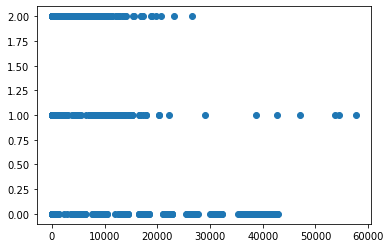

In [138]:
#Visualisation des clusters
plt.scatter(xx1.duration,labels)
plt.show()
colormap=np.array(['Red','green','blue'])

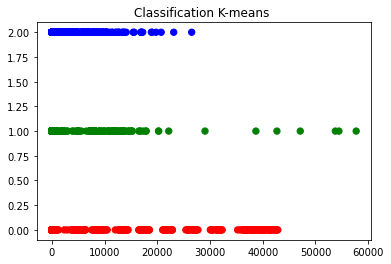

In [139]:
#Visualisation des clusters formés par K-Means
plt.scatter(xx1.duration	,labels,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')
plt.show()

les améliorations remarquées le nombre des anomaly diminuer

In [140]:
#Mesurez les performances de cet algorithme
#
from sklearn.metrics import silhouette_score
score = []
#
for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(data1)
    labels = kmeans.labels_
    score.append(silhouette_score(data1, labels, metric = 'euclidean'))#append(kmeans.inertia_)

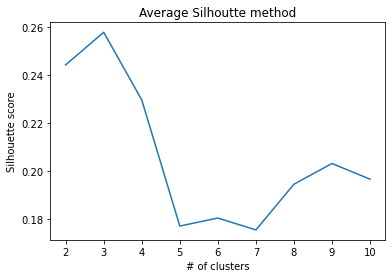

In [141]:
# plotting the score
plt.plot(range(2,11), score)
plt.title('Average Silhoutte method')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')
plt.show()